In [88]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
study_results = pd.read_csv("C:/Users/Sam Kumar/Desktop/Study_Results.csv")
mouse_metadata = pd.read_csv("C:/Users/Sam Kumar/Desktop/Mouse_metadata.csv")
df = pd.merge(mouse_metadata, study_results , how = "inner")
print(df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [89]:
x = len(mouse_metadata.index)
print(x)
# amount of mice

249


In [90]:
duplicatedata = df.duplicated(subset = ['Mouse ID', 'Timepoint'])
print(df[duplicatedata]['Mouse ID'].values)

['g989' 'g989' 'g989' 'g989' 'g989']


In [91]:
df = df[df['Mouse ID'] != 'g989']
print(df)
#dropping duplicates as well as 'g989' row

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [92]:
mouse_metadata = mouse_metadata[mouse_metadata['Mouse ID'] != 'g989']
x = len(mouse_metadata.index)
print(x)
#new amount of mice

248


In [93]:
df_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().reset_index(name = 'mean')
df_stats1 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().reset_index(name = 'median')
df_stats2 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().reset_index(name = 'var')
df_stats3 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().reset_index(name = 'sem')
df_stats4 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().reset_index(name = 'std')
df_stats['median'] = df_stats1['median'].values
df_stats['var'] = df_stats2['var'].values
df_stats['sem'] = df_stats3['sem'].values
df_stats['std'] = df_stats4['std'].values
print(df_stats)

  Drug Regimen       mean     median        var       sem       std
0    Capomulin  40.675741  41.557809  24.947764  0.329346  4.994774
1     Ceftamin  52.591172  51.776157  39.290177  0.469821  6.268188
2    Infubinol  52.884795  51.820584  43.128684  0.492236  6.567243
3     Ketapril  55.235638  53.698743  68.553577  0.603860  8.279709
4     Naftisol  54.331565  52.509285  66.173479  0.596466  8.134708
5      Placebo  54.033581  52.288934  61.168083  0.581331  7.821003
6     Propriva  52.320930  50.446266  43.852013  0.544332  6.622085
7     Ramicane  40.216745  40.673236  23.486704  0.320955  4.846308
8     Stelasyn  54.233149  52.431737  59.450562  0.573111  7.710419
9    Zoniferol  53.236507  51.818479  48.533355  0.516398  6.966589


In [94]:
df_stats5 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median',np.std,'var','sem'])
print(df_stats5)

                   mean     median       std        var       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin      52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol     52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril      55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol      54.331565  52.509285  8.134708  66.173479  0.596466
Placebo       54.033581  52.288934  7.821003  61.168083  0.581331
Propriva      52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane      40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn      54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol     53.236507  51.818479  6.966589  48.533355  0.516398


  Drug Regimen  count
0    Capomulin     25
1     Ceftamin     25
2    Infubinol     25
3     Ketapril     25
4     Naftisol     25
5      Placebo     25
6     Propriva     24
7     Ramicane     25
8     Stelasyn     24
9    Zoniferol     25


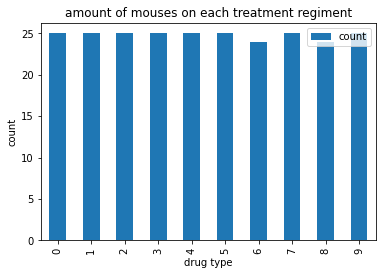

In [95]:

df_bar = mouse_metadata.groupby('Drug Regimen')['Mouse ID'].count().reset_index(name ='count')
ax = df_bar.plot(kind = 'bar', title='amount of mouses on each treatment regiment')
ax.set_xlabel("drug type")
ax.set_ylabel("count")
print(df_bar)

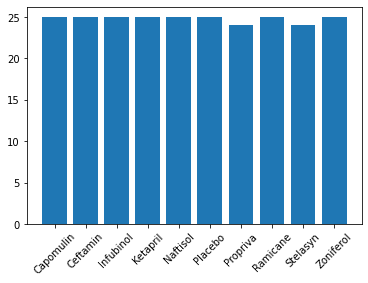

In [96]:
drugs = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo'
         ,'Propriva','Ramicane','Stelasyn','Zoniferol']
count = df_bar['count'].values
positions = [0,1,2,3,4,5,6,7,8,9]
plt.bar(df_bar['Drug Regimen'].values, count)
plt.xticks(positions,drugs, rotation = 45)
plt.show()


AxesSubplot(0.260833,0.125;0.503333x0.755)


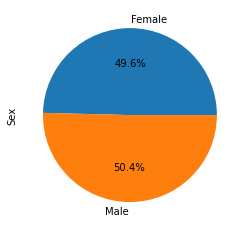

In [97]:
df_3 = df.drop_duplicates(subset = ['Mouse ID'], keep = "first", inplace = False)
print(df_3.groupby(['Sex']).Sex.count().plot(kind='pie', autopct='%1.1f%%'))



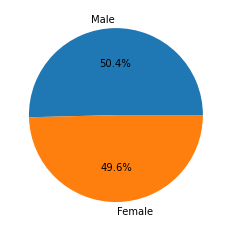

In [98]:

labels = 'Male', 'Female'
plt.pie(df_3['Sex'].value_counts(), labels = labels, autopct='%1.1f%%')
plt.show()

In [99]:
df_45 = df[df['Timepoint'] == 45]
df_next = pd.merge(mouse_metadata, df_45, how = "left")
print(df_next)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16       45.0   
1       s185    Capomulin  Female           3          17       45.0   
2       x401    Capomulin  Female          16          15       45.0   
3       m601    Capomulin    Male          22          17       45.0   
4       g791     Ramicane    Male          11          16       45.0   
..       ...          ...     ...         ...         ...        ...   
243     z314     Stelasyn  Female          21          28        NaN   
244     z435     Propriva  Female          12          26        NaN   
245     z581    Infubinol  Female          24          25       45.0   
246     z795     Naftisol  Female          13          29       45.0   
247     z969     Naftisol    Male           9          30       45.0   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126               1.0  
1             23.343598               1.0  
2  

Capomulin 25 percentile :
32.37735684
IQR:
7.781863460000004
Capomulin 75 percentile: 
40.1592203
Are there outliers: 
[] []


<ipython-input-100-53a7940a37d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capomulin.dropna(subset = ["Tumor Volume (mm3)"], inplace=True)


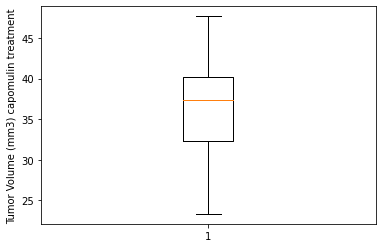

Ramicane 25 percentile :
32.37735684
IQR:
7.781863460000004
Ramicane 75 percentile: 
Are there outliers: 
[] []


<ipython-input-100-53a7940a37d8>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ramicane.dropna(subset = ["Tumor Volume (mm3)"], inplace=True)


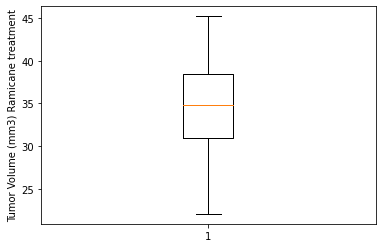

Infubinol 25 percentile :
62.75445141
IQR:
4.9311172099999965
Infubinol 75 percentile: 
67.68556862
Are there outliers: 
[] []


<ipython-input-100-53a7940a37d8>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_infubinol.dropna(subset = ["Tumor Volume (mm3)"], inplace=True)


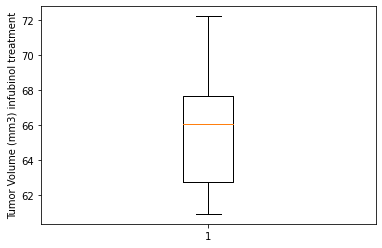

Ceftamin 25 percentile :
61.43389223
IQR:
6.093590140000003
cefatmin 75 percentile: 
67.52748237
Are there outliers: 
[] []
looks like no outliers


<ipython-input-100-53a7940a37d8>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ceftamin.dropna(subset = ["Tumor Volume (mm3)"], inplace=True)


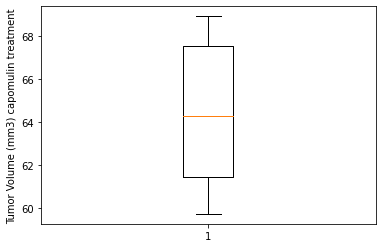

In [100]:
df_45 = df[df['Timepoint'] == 45]
df_next = pd.merge(mouse_metadata, df_45, how = "left")
list1 = list(df_next['Drug Regimen'].unique())
list2 = list(df_next['Tumor Volume (mm3)'].unique())
df_capomulin = df_next[df_next['Drug Regimen'] == 'Capomulin']
df_capomulin.dropna(subset = ["Tumor Volume (mm3)"], inplace=True)
print("Capomulin 25 percentile :")
x = st.scoreatpercentile(df_capomulin['Tumor Volume (mm3)'],25)
print(x)
print("IQR:")
y = st.iqr(df_capomulin['Tumor Volume (mm3)'])
print(y)
print("Capomulin 75 percentile: ")
z = st.scoreatpercentile(df_capomulin['Tumor Volume (mm3)'],75)
print(z)
a = x - 1.5*y
b = z +1.5*y
df_minoutlier = df_capomulin[df_capomulin['Tumor Volume (mm3)'] < a]
df_maxoutlier = df_capomulin[df_capomulin['Tumor Volume (mm3)'] > b]
print("Are there outliers: ")
print(df_minoutlier.values, df_maxoutlier.values)
graph4= plt.boxplot(df_capomulin['Tumor Volume (mm3)'].values)
plt.ylabel("Tumor Volume (mm3) capomulin treatment")
plt.show()
df_ramicane = df_next[df_next['Drug Regimen'] == 'Ramicane']
df_ramicane.dropna(subset = ["Tumor Volume (mm3)"], inplace=True)
print("Ramicane 25 percentile :")
x = st.scoreatpercentile(df_capomulin['Tumor Volume (mm3)'],25)
print(x)
print("IQR:")
y = st.iqr(df_capomulin['Tumor Volume (mm3)'])
print(y)
print("Ramicane 75 percentile: ")
z = st.scoreatpercentile(df_ramicane['Tumor Volume (mm3)'],75)
a = x - 1.5*y
b = z +1.5*y
df_minoutlier = df_ramicane[df_ramicane['Tumor Volume (mm3)'] < a]
df_maxoutlier = df_ramicane[df_ramicane['Tumor Volume (mm3)'] > b]
print("Are there outliers: ")
print(df_minoutlier.values, df_maxoutlier.values)
graph3 = plt.boxplot(df_ramicane['Tumor Volume (mm3)'].values)
plt.ylabel("Tumor Volume (mm3) Ramicane treatment")
plt.show()
df_infubinol = df_next[df_next['Drug Regimen'] == 'Infubinol']
df_infubinol.dropna(subset = ["Tumor Volume (mm3)"], inplace=True)
print("Infubinol 25 percentile :")
x = st.scoreatpercentile(df_infubinol['Tumor Volume (mm3)'],25)
print(x)
print("IQR:")
y = st.iqr(df_infubinol['Tumor Volume (mm3)'])
print(y)
print("Infubinol 75 percentile: ")
z = st.scoreatpercentile(df_infubinol['Tumor Volume (mm3)'],75)
print(z)

a = x - 1.5*y
b = z +1.5*y
df_minoutlier = df_infubinol[df_infubinol['Tumor Volume (mm3)'] < a]
df_maxoutlier = df_infubinol[df_infubinol['Tumor Volume (mm3)'] > b]
print("Are there outliers: ")
print(df_minoutlier.values, df_maxoutlier.values)
graph1 = plt.boxplot(df_infubinol['Tumor Volume (mm3)'].values)
plt.ylabel("Tumor Volume (mm3) infubinol treatment")
plt.show()
df_ceftamin = df_next[df_next['Drug Regimen'] == 'Ceftamin']
df_ceftamin.dropna(subset = ["Tumor Volume (mm3)"], inplace=True)
print("Ceftamin 25 percentile :")
x = st.scoreatpercentile(df_ceftamin['Tumor Volume (mm3)'],25)
print(x)
print("IQR:")
y = st.iqr(df_ceftamin['Tumor Volume (mm3)'])
print(y)
print("cefatmin 75 percentile: ")
z = st.scoreatpercentile(df_ceftamin['Tumor Volume (mm3)'],75)
print(z)
a = x - 1.5*y
b = z +1.5*y
df_minoutlier = df_ceftamin[df_ceftamin['Tumor Volume (mm3)'] < a]
df_maxoutlier = df_ceftamin[df_ceftamin['Tumor Volume (mm3)'] > b]
print("Are there outliers: ")
print(df_minoutlier.values, df_maxoutlier.values)
print("looks like no outliers")
graph2 = plt.boxplot(df_ceftamin['Tumor Volume (mm3)'].values)
plt.ylabel("Tumor Volume (mm3) capomulin treatment")
plt.show()

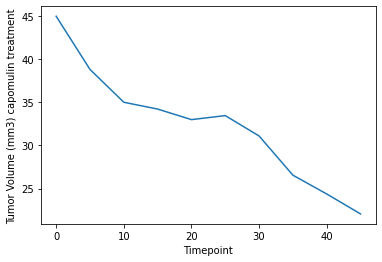

In [101]:
x = [0, 5, 10, 15, 20 , 25 ,30, 35, 40, 45]
list3 = list(df['Tumor Volume (mm3)'].head(10).values)
plt.plot(x,list3)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3) capomulin treatment")
plt.show()

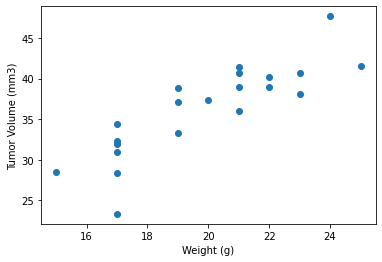

In [102]:
scattervar2 = list(df_capomulin['Tumor Volume (mm3)'].values)
scattervar1 = list(df_capomulin['Weight (g)'].values)
plt.scatter(scattervar1, scattervar2)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [103]:
print("correlation: ")
print(st.pearsonr(scattervar1, scattervar2)[0])

correlation: 
0.8490719078173734
